In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import cv2
import numpy as np

data_dir = r"C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\dl_dataset"
categories = ["flooded", "nonflooded"]

X = []
y = []
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        print("\r",os.path.exists(img_path),end="  ")
        print("\r",img_path,end="   ")
        try:
          img = cv2.resize(img, (64, 64))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = img.astype("float32") / 255.0
          X.append(img)
          y.append(categories.index(category))
        except:
          print(img)

X = np.array(X)
y = np.array(y)

# Step 2: Split the dataset
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


 C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\dl_dataset\flooded\0.jpg   None
 C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\dl_dataset\nonflooded\8223.JPG   

In [27]:

# Step 3: Define the MLP classifier
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Step 4: Train the MLP classifier
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=30, batch_size=12)

# Step 5: Evaluate the MLP classifier
loss, accuracy = model.evaluate(X_test, y_test)


Epoch 1/30
31/31 [==============================] - 8s 226ms/step - loss: 1.7681 - accuracy: 0.5134 - val_loss: 0.7261 - val_accuracy: 0.5851
Epoch 2/30
31/31 [==============================] - 7s 210ms/step - loss: 0.8126 - accuracy: 0.5672 - val_loss: 0.5057 - val_accuracy: 0.7553
Epoch 3/30
31/31 [==============================] - 7s 211ms/step - loss: 0.5987 - accuracy: 0.6855 - val_loss: 0.5018 - val_accuracy: 0.7660
Epoch 4/30
31/31 [==============================] - 6s 206ms/step - loss: 0.5276 - accuracy: 0.7715 - val_loss: 0.5876 - val_accuracy: 0.7021
Epoch 5/30
31/31 [==============================] - 7s 218ms/step - loss: 0.4803 - accuracy: 0.7473 - val_loss: 0.6053 - val_accuracy: 0.6064
Epoch 6/30
31/31 [==============================] - 7s 212ms/step - loss: 0.4915 - accuracy: 0.7339 - val_loss: 0.4447 - val_accuracy: 0.7979
Epoch 7/30
31/31 [==============================] - 6s 205ms/step - loss: 0.4174 - accuracy: 0.8333 - val_loss: 0.5634 - val_accuracy: 0.7234
Epoch 

In [32]:
print("Accuracy: ", str(accuracy)[:5])
print("Loss: ",str(loss)[:5])

Accuracy:  0.803
Loss:  0.455


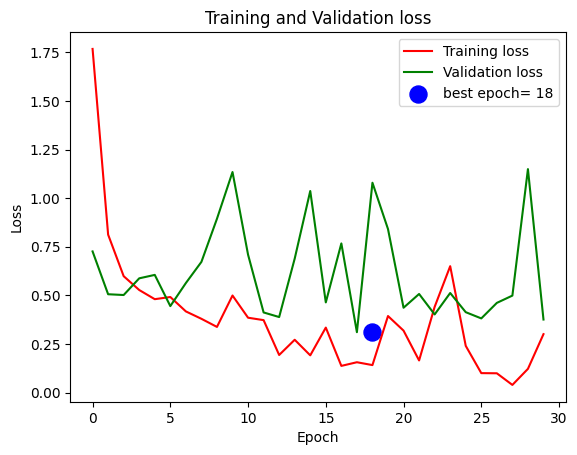

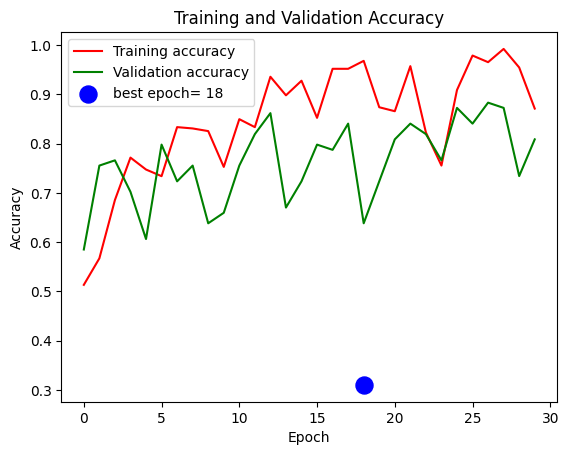

In [28]:
# Make a plot of training loss and validation loss to check for the regular fit of the trained network
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
loss_label = f'best epoch= {str(index_loss + 1)}'


plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.show()
    
# Make a plot of training accuracy and validation accuracy to check for the regular fit of the trained network
plt.plot(history.history['accuracy'],'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'],'g', label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.tight_layout
plt.show()


In [29]:
model.save("mlp")
model.save_weights("mlp.h5")

INFO:tensorflow:Assets written to: mlp\assets


INFO:tensorflow:Assets written to: mlp\assets
